In [1]:
import torch
import torchvision.models as models
from torchvision import transforms as T

from PIL import Image

In [2]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [3]:
"""
alexnet = models.alexnet(pretrained=True)

vgg11 = models.vgg11(pretrained=True)
vgg11_bn = models.vgg11_bn(pretrained=True)
vgg13 =  models.vgg13(pretrained=True)
vgg13_bn = models.vgg13_bn(pretrained=True)
vgg19 = models.vgg19(pretrained=True)
vgg19_bn = models.vgg19_bn(pretrained=True)


resnet18 = models.resnet18(pretrained=True)
resnet34 = models.resnet34(pretrained=True)
resnet50 = models.resnet50(pretrained=True)
resnet101 = models.resnet101(pretrained=True)
resnet152 = models.resnet152(pretrained=True)

squeezenet1_0 = models.squeezenet1_0(pretrained=True)
squeezenet1_1 = models.squeezenet1_1(pretrained=True)

d121 = models.densenet121(pretrained=True)
d161 = models.densenet161(pretrained=True)
d169 = models.densenet169(pretrained=True)
d201 = models.densenet201(pretrained=True)


inception3 = models.inception_v3(pretrained=True)

googlenet = models.googlenet(pretrained=True)
inception3 = models.inception_v3(pretrained=True)

googlenet = models.googlenet(pretrained=True)

mobilenet = models.mobilenet_v2(pretrained=True)

resnext101 = models.resnext101_32x8d(pretrained=True)
resnext50 = models.resnext50_32x4d(pretrained=True)

wideresnet101 = models.wide_resnet101_2(pretrained=True)
wideresnet50 = models.wide_resnet50_2(pretrained=True)



mobilenet = models.mobilenet_v2(pretrained=True)

resnext101 = models.resnext101_32x8d(pretrained=True)
resnext50 = models.resnext50_32x4d(pretrained=True)

wideresnet101 = models.wide_resnet101_2(pretrained=True)
wideresnet50 = models.wide_resnet50_2(pretrained=True)

MNASnet0_5 = models.mnasnet0_5(pretrained=True)
MNASnet1_0 = models.mnasnet1_0(pretrained=True)

"""


'\nalexnet = models.alexnet(pretrained=True)\n\nvgg11 = models.vgg11(pretrained=True)\nvgg11_bn = models.vgg11_bn(pretrained=True)\nvgg13 =  models.vgg13(pretrained=True)\nvgg13_bn = models.vgg13_bn(pretrained=True)\nvgg19 = models.vgg19(pretrained=True)\nvgg19_bn = models.vgg19_bn(pretrained=True)\n\n\nresnet18 = models.resnet18(pretrained=True)\nresnet34 = models.resnet34(pretrained=True)\nresnet50 = models.resnet50(pretrained=True)\nresnet101 = models.resnet101(pretrained=True)\nresnet152 = models.resnet152(pretrained=True)\n\nsqueezenet1_0 = models.squeezenet1_0(pretrained=True)\nsqueezenet1_1 = models.squeezenet1_1(pretrained=True)\n\nd121 = models.densenet121(pretrained=True)\nd161 = models.densenet161(pretrained=True)\nd169 = models.densenet169(pretrained=True)\nd201 = models.densenet201(pretrained=True)\n\n\ninception3 = models.inception_v3(pretrained=True)\n\ngooglenet = models.googlenet(pretrained=True)\ninception3 = models.inception_v3(pretrained=True)\n\ngooglenet = models.

In [4]:

transform = T.Compose([            
 T.Resize(256),                    
 T.CenterCrop(224),                
 T.ToTensor(),                     
 T.Normalize(mean=[0.485, 0.456, 0.406],
             std=[0.229, 0.224, 0.225])
 ])


In [5]:
trn = T.Compose([
                 T.ToTensor(),
            T.Normalize(mean=[0.485, 0.456, 0.406],
             std=[0.229, 0.224, 0.225])])

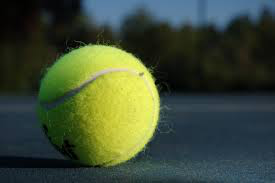

In [7]:
img = Image.open("tennis.jpeg")
img

In [8]:

transformed_img = trn(img)
input_img = torch.unsqueeze(transformed_img,0)

In [14]:

model = models.alexnet(pretrained=True)

In [15]:
output = model(input_img)
print(output.shape)

torch.Size([1, 1000])


In [16]:
with open('imagenet_classes.txt') as f:
  classes = [line.strip() for line in f.readlines()]


In [17]:
_, index = torch.max(output, 1)
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
print(classes[index[0]], percentage[index[0]].item())


tennis ball 99.92438507080078


In [18]:
_, indices = torch.sort(output, descending=True)
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]


[('tennis ball', 99.92438507080078),
 ('racket, racquet', 0.021143058314919472),
 ('acorn', 0.018191080540418625),
 ('golf ball', 0.004408565349876881),
 ('Granny Smith', 0.0032543044071644545)]